In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# The csv file is read
data_folder = './Data/'
df = pd.read_csv(data_folder + 'MassShootings.csv')

# Unrelevant columns for the study are dropped
df = df.drop(columns = ['year', 'summary', 'prior_signs_mental_health_issues', 'mental_health_details', 'mental_health_sources', 'sources_additional_age', 'latitude', 'longitude'])

# Location is splited in 2 columns for better analysis
df[['town', 'state']] = df['location'].str.split(', ', expand = True)

# Mass shooting's date is converted in datetime format for better handling
df['date'] = pd.to_datetime(df['date'])

# Quotebank dataset is limited to years 2015-2021. Same time span is applied here
df = df.drop(df[df['date'].dt.year < 2015].index)

df.head()

,case,location,date,fatalities,injured,total_victims,location.1,age_of_shooter,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,sources,type,town,state
0,San Jose VTA shooting,"San Jose, California",2021-05-26,9,0,9,Workplace,57,-,-,semiautomatic handguns,-,-,M,https://www.sfchronicle.com/crime/article/Mass...,Mass,San Jose,California
1,FedEx warehouse shooting,"Indianapolis, Indiana",2021-04-15,8,7,15,Workplace,19,yes,-,semiautomatic rifle,-,White,M,https://www.indystar.com/story/news/crime/2021...,Mass,Indianapolis,Indiana
2,Orange office complex shooting,"Orange, California",2021-03-31,4,1,5,Workplace,-,-,-,semiautomatic handgun,-,-,M,https://www.latimes.com/california/story/2021-...,Mass,Orange,California
3,Boulder supermarket shooting,"Boulder, Colorado",2021-03-22,10,0,10,Workplace,21,Yes,-,"semiautomatic rifle, semiautomatic handgun; ta...",Ruger AR-556; weapon was purchased six days be...,-,M,https://www.denverpost.com/2021/03/22/police-a...,Mass,Boulder,Colorado
4,Atlanta massage parlor shootings,"Atlanta, Georgia",2021-03-16,8,1,9,Workplace,21,-,-,-,-,White,M,https://www.ajc.com/news/breaking-multiple-sho...,Spree,Atlanta,Georgia


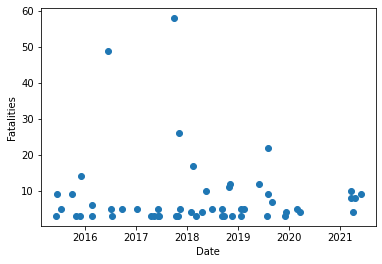

In [2]:
# ploting all shootings since 2015 according to the fatalities
plt.scatter(df['date'], df['fatalities'])
plt.xlabel('Date')
plt.ylabel('Fatalities')
plt.show()

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

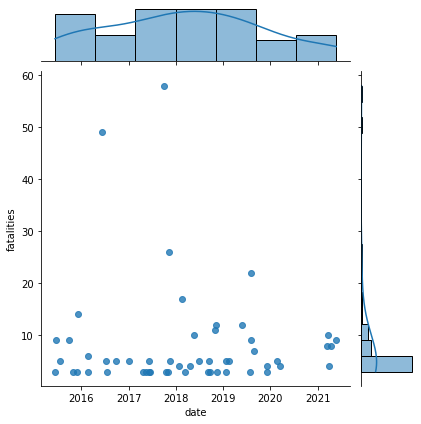

In [3]:
sns.jointplot(data = df, x = 'date', y = 'fatalities', kind="reg")

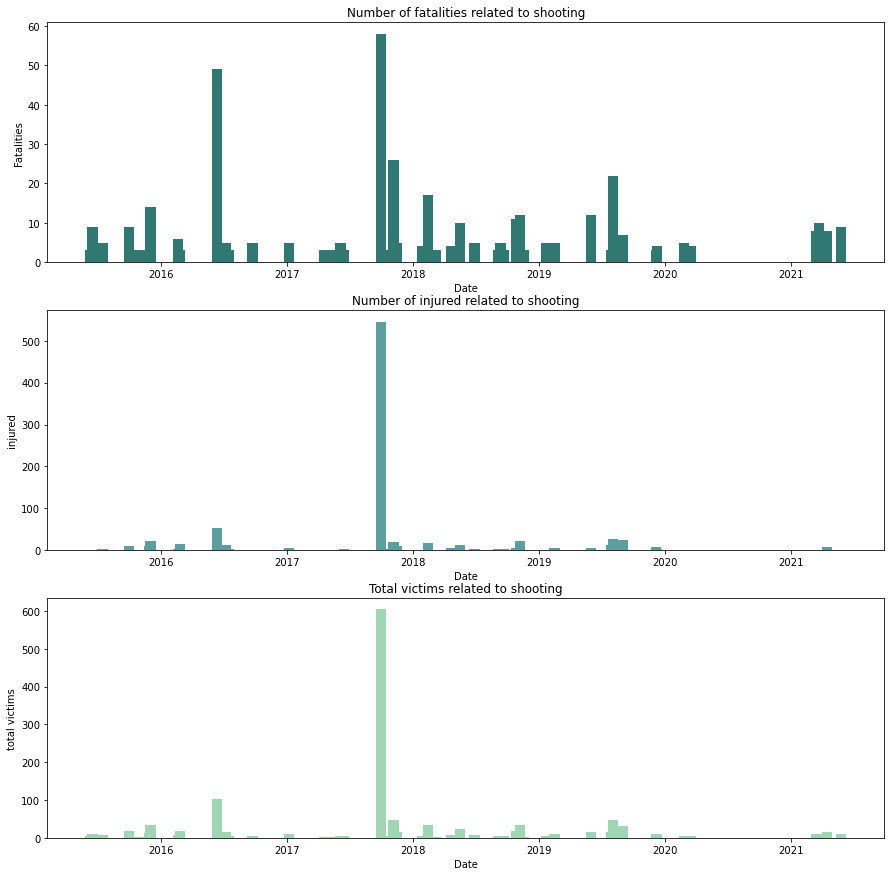

In [4]:
# The distribution of of fatalities, injured, total per month is plotted here
fig, ax = plt.subplots(3,1,figsize=(15, 15))
# Add x-axis and y-axis
ax[0].bar(df['date'], df['fatalities'], width = 30, color = '#317873') #chosing the width to be equal to a month
ax[1].bar(df['date'], df['injured'], width = 30, color = '#5f9ea0')
ax[2].bar(df['date'], df['total_victims'], width = 30,  color = '#a0d6b4')

# Set title and labels for axes
ax[0].set(xlabel="Date", ylabel="Fatalities", title="Number of fatalities related to shooting")
ax[1].set(xlabel="Date", ylabel="injured", title="Number of injured related to shooting")
ax[2].set(xlabel="Date", ylabel="total victims", title="Total victims related to shooting")


plt.show()

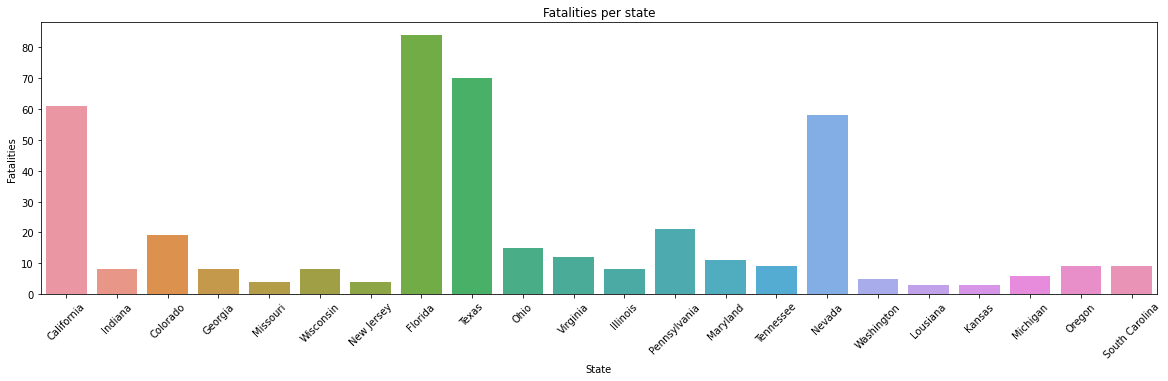

In [5]:
#ploting the number of fatalities in each state
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.barplot(y = df['fatalities'], x = df['state'], estimator = sum, ci = None)
plt.xticks(rotation=45)
ax.set(xlabel="State", ylabel="Fatalities", title="Fatalities per state")
plt.show()

In [6]:
# looking at the distribution of fatalities
df['fatalities'].describe()

count    53.000000
mean      8.207547
std      10.286957
min       3.000000
25%       3.000000
50%       5.000000
75%       9.000000
max      58.000000
Name: fatalities, dtype: float64

Text(0.5, 1.0, 'The distribution of fatalities')

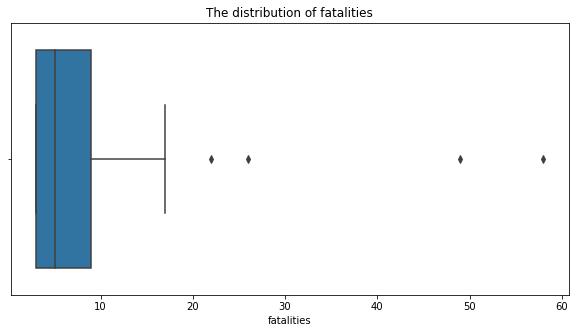

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(10,5))
axs = sns.boxplot(x = df['fatalities'])
axs.set_title('The distribution of fatalities')

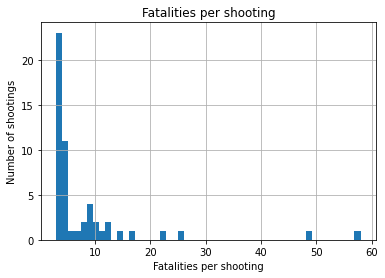

In [8]:
df['fatalities'].hist(bins= 50)
plt.xlabel('Fatalities per shooting')
plt.ylabel('Number of shootings')
plt.title('Fatalities per shooting');

! Powerlaw